Lab #1
- Marcel Castro
- Ulises Fonseca

First we authorize the notebook to access the google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We load libraries

In [ ]:
from io import StringIO
import requests
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import seaborn as sns # Data visualization library built on top of matplotlib.
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
import bokeh.io
from itertools import combinations

---
**1.** We load the dataset from Google Drive and GitHub


In [ ]:
# Drive
realEstate = pd.read_csv('/content/drive/MyDrive/LabsUlisesMarcel/Lab1/Dataset/Original.csv', sep=';', on_bad_lines='skip')

In [ ]:
# GitHub
url = "https://raw.githubusercontent.com/ulisesfh02/LabsMachineLearning/master/Lab%231/Dataset/Original.csv"

# Send a request to GitHub (no token needed for raw content)
response = requests.get(url)

# Load the CSV into a DataFrame
realEstate = pd.read_csv(StringIO(response.text), sep=';', on_bad_lines='skip')

---
**2.** Data exploration is performed to understand the dataset structure using the head(), tail(), info() and describe() functions.




In [ ]:
# Explore the first and last rows of the dataset
print("Primeras filas del dataset:")
print(realEstate.head())

print("\nLast rows of the dataset:")
print(realEstate.tail())

# Información general sobre el dataset
print("\nDataset information:")
realEstate.info()

# Estadísticas descriptivas
print("\nDescriptive statistics of the dataset:")
print(realEstate.describe())

Primeras filas del dataset:
   name_nsi   price index environment quality_of_living safety transport  \
0  Semerovo   42000   NaN         NaN               NaN    NaN       NaN   
1  Semerovo   42000   NaN         NaN               NaN    NaN       NaN   
2   Štúrovo  107000   8,3         NaN               NaN    NaN       NaN   
3   Štúrovo  105000   NaN         NaN               NaN    NaN       NaN   
4   Štúrovo   82000   NaN         NaN               NaN    NaN       NaN   

  services relax                condition  ... last_reconstruction  \
0      NaN   NaN       Original condition  ...                 NaN   
1      NaN   NaN       Original condition  ...                 NaN   
2      NaN   NaN   Partial reconstruction  ...                 NaN   
3      NaN   NaN  Complete reconstruction  ...                 NaN   
4      NaN   NaN   Partial reconstruction  ...              2018.0   

   total_floors  floor lift balkonies loggia  cellar              type  rooms  \
0           N

Some important characteristics of the dataset are:

In [ ]:
# It was identified that the dataset contains numeric values that use comma as decimal point, they will be changed to dots for better data handling
realEstate = realEstate.replace({',': '.'}, regex=True)
realEstate = realEstate.apply(pd.to_numeric, errors='ignore')

---
**3.** We identify null values in the dataset, we will use 3 techniques to handle these values.

In [ ]:
# Se pueden identificar los valores nulos con la funcion isnull()
# Primero vemos los primeros valores del dataset
realEstate.head()

name_nsi   price  index  environment  quality_of_living  safety  transport  \
0  Semerovo   42000    NaN          NaN                NaN     NaN        NaN   
1  Semerovo   42000    NaN          NaN                NaN     NaN        NaN   
2   Štúrovo  107000    8.3          NaN                NaN     NaN        NaN   
3   Štúrovo  105000    NaN          NaN                NaN     NaN        NaN   
4   Štúrovo   82000    NaN          NaN                NaN     NaN        NaN   

   services  relax                condition  ...  last_reconstruction  \
0       NaN    NaN       Original condition  ...                  NaN   
1       NaN    NaN       Original condition  ...                  NaN   
2       NaN    NaN   Partial reconstruction  ...                  NaN   
3       NaN    NaN  Complete reconstruction  ...                  NaN   
4       NaN    NaN   Partial reconstruction  ...               2018.0   

   total_floors  floor lift balkonies loggia  cellar              type  rooms  \
0           NaN    NaN    0       NaN    NaN       0  3-room apartment      3   
1           2.0    NaN    0       NaN    NaN       0  3-room apartment      3   
2           5.0    3.0    0       NaN    NaN       0  1-room apartment      1   
3           7.0    4.0    1       NaN    NaN       0  3-room apartment      3   
4           NaN    2.0    0       NaN    NaN       0  2-room apartment      2   

     district  
0  Nové Zámky  
1  Nové Zámky  
2  Nové Zámky  
3  Nové Zámky  
4  Nové Zámky  

[5 rows x 27 columns]

In [ ]:
# Con la funcion isnull(), los valores NaN se ven como True, y el resto se ve como False.
realEstate.head().isnull()

name_nsi  price  index  environment  quality_of_living  safety  transport  \
0     False  False   True         True               True    True       True   
1     False  False   True         True               True    True       True   
2     False  False  False         True               True    True       True   
3     False  False   True         True               True    True       True   
4     False  False   True         True               True    True       True   

   services  relax  condition  ...  last_reconstruction  total_floors  floor  \
0      True   True      False  ...                 True          True   True   
1      True   True      False  ...                 True         False   True   
2      True   True      False  ...                 True         False  False   
3      True   True      False  ...                 True         False  False   
4      True   True      False  ...                False          True  False   

    lift  balkonies  loggia  cellar   type  rooms  district  
0  False       True    True   False  False  False     False  
1  False       True    True   False  False  False     False  
2  False       True    True   False  False  False     False  
3  False       True    True   False  False  False     False  
4  False       True    True   False  False  False     False  

[5 rows x 27 columns]

In [ ]:
# With the fillna() function we can replace all null values with any desired value, in this case we will use 0.
startA1 = timeit.default_timer()
A1 = realEstate.fillna(0)
endA1 = timeit.default_timer()

# Con la funcion fillna(), en las columnas numericas se pueden reemplazar todos
# los valores nulos por la media de los valores no nulos de la columna. En las columnas
# categoricas, los valores nulos se pueden reemplazar por "unknown"
startA2 = timeit.default_timer()
A2 = realEstate.copy()
A2.fillna(A2.select_dtypes(include=['number']).mean(), inplace=True)
A2.fillna(A2.select_dtypes(include=['object']).fillna('unknown'), inplace=True)
endA2 = timeit.default_timer()

# Con la funcion dropna() se eliminan las filas que contienen por lo menos un valor nulo
startA3 = timeit.default_timer()
A3 = realEstate.dropna()
endA3 = timeit.default_timer()

In [ ]:
print("Tiempo en crear el df A1: " + str(endA1-startA1))
print("Tiempo en crear el df A2: " + str(endA2-startA2))
print("Tiempo en crear el df A3: " + str(endA3-startA3))

Tiempo en crear el df A1: 0.012198417999996991
Tiempo en crear el df A2: 0.03926510200000166
Tiempo en crear el df A3: 0.005434759999985772


It is observed that df A2 takes a bit longer to create, in this case all NaN values are replaced by the mean in numeric columns, and in categorical columns they are replaced by "unknown". On the other hand, A3 takes the least time to create, with dropna() all rows that have at least one NaN value are eliminated, it was identified that all rows had at least one NaN value, which is why the df ended up empty.

---
**4.** Now we will normalize and scale the numeric data using MinMaxScaler and StandardScaler from scikit-learn.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Seleccionar solo las columnas numéricas del dataset A2
numeric_columns = A2.select_dtypes(include=['float64', 'int64']).columns
# Seleccionar también las columnas categóricas para mantenerlas luego de la normalización/escalado
categorical_columns = A2.select_dtypes(exclude=['float64', 'int64']).columns

# Extraer los datos numéricos y categóricos por separado
numeric_data = A2[numeric_columns]
categorical_data = A2[categorical_columns]

# Normalization with MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_numeric_data_minmax = pd.DataFrame(scaler_minmax.fit_transform(numeric_data), columns=numeric_columns)

# Standardization with StandardScaler
scaler_standard = StandardScaler()
scaled_numeric_data_standard = pd.DataFrame(scaler_standard.fit_transform(numeric_data), columns=numeric_columns)

# Juntar los datos normalizados/escalados con las columnas categóricas originales
B1 = pd.concat([scaled_numeric_data_minmax, categorical_data.reset_index(drop=True)], axis=1)
B2 = pd.concat([scaled_numeric_data_standard, categorical_data.reset_index(drop=True)], axis=1)

# Mostrar las primeras filas de los datasets normalizados y escalados
print("Datos normalizados con MinMaxScaler (B1):")
print(B1.head())

print("\nDatos escalados con StandardScaler (B2):")
print(B2.head())

Datos normalizados con MinMaxScaler (B1):
      price     index  environment  quality_of_living    safety  transport  \
0  0.003073  0.724460     0.702894           0.832295  0.755978   0.800027   
1  0.003073  0.724460     0.702894           0.832295  0.755978   0.800027   
2  0.009623  0.806452     0.702894           0.832295  0.755978   0.800027   
3  0.009421  0.724460     0.702894           0.832295  0.755978   0.800027   
4  0.007104  0.724460     0.702894           0.832295  0.755978   0.800027   

   services    relax      area  energy_costs  ...    loggia  cellar  rooms  \
0  0.745674  0.49403  0.000272      0.378610  ...  0.026809     0.0   0.50   
1  0.745674  0.49403  0.000272      0.378610  ...  0.026809     0.0   0.50   
2  0.745674  0.49403  0.000186      0.378610  ...  0.026809     0.0   0.00   
3  0.745674  0.49403  0.000357      0.521739  ...  0.026809     0.0   0.50   
4  0.745674  0.49403  0.000295      0.378610  ...  0.026809     0.0   0.25   

   name_nsi         

So what the previous code does is create two new datasets B1 (normalized) and B2 (scaled) with the numeric features from the original dataset.

---
**5.** We transform the categorical variables in numeric representations, first making One Hot Encoding


In [ ]:
# categorical_columns = B1.select_dtypes(include=['object']).columns.tolist()
# print(categorical_columns)
# # Inicializamos el OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)

# # Aplicamos One Hot Encoding a las columnas categoricas
# one_hot_encoded = encoder.fit_transform(B1[categorical_columns])

# # Creamos un dataframe con las columnas One Hot Encoded, con get_feature_names_out
# # obtenemos los nombres de las columnas para los datos One Hot Encoded
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# # Concatenamos el dataframe original con el One Hot Encoded
# C1 = pd.concat([B1, one_hot_df], axis=1)

# # Eliminamos las columnas categoricas originales
# C1 = C1.drop(categorical_columns, axis=1)


After applying One Hot Encoding, the resulting dataframe had 741 columns, mainly due to the name_nsi column having 598 unique values and the district column having 79. A dataframe with so many columns is difficult to manage, so this approach was discarded. Using Label Encoding on those same columns would also be uninformative due to the high number of unique values.

On the other hand, Label Encoding was applied to 5 out of the 7 categorical variables, as they had a low number of unique values, making them more manageable.

In [ ]:
C1 = B1.copy()

# Definimos las columnas para hacer label encode
columns_to_encode = ['condition', 'certificate', 'construction_type', 'orientation', 'type']

# Aqui se guardan los label encoders
label_encoders = {}

# Aplicamos LabelEncoder a las columnas especificadas en la copia
for col in columns_to_encode:
    labelEncoder = LabelEncoder()
    C1[col] = labelEncoder.fit_transform(C1[col])  # Transformar las categorías en números
    label_encoders[col] = labelEncoder  # Guardar el encoder para referencia futura

In [ ]:
C1.head()
# Con classes_ podemos ver el numero de cada label
#print(label_encoders['condition'].classes_)

price     index  environment  quality_of_living    safety  transport  \
0  0.007356  0.724460     0.702894           0.832295  0.755978   0.800027   
1  0.007356  0.724460     0.702894           0.832295  0.755978   0.800027   
2  0.009623  0.774194     0.702894           0.832295  0.755978   0.800027   
3  0.009421  0.724460     0.702894           0.832295  0.755978   0.800027   
4  0.007356  0.724460     0.702894           0.832295  0.755978   0.800027   

   services    relax      area  energy_costs  ...    loggia  cellar  rooms  \
0  0.745674  0.49403  0.000272       0.37861  ...  0.026809     0.0   0.50   
1  0.745674  0.49403  0.000272       0.37861  ...  0.026809     0.0   0.50   
2  0.745674  0.49403  0.000200       0.37861  ...  0.026809     0.0   0.25   
3  0.745674  0.49403  0.000357       0.37861  ...  0.026809     0.0   0.50   
4  0.745674  0.49403  0.000295       0.37861  ...  0.026809     0.0   0.25   

   name_nsi  condition  certificate  construction_type  orientation  type  \
0  Semerovo          3            8                 11            8     2   
1  Semerovo          3            7                  6            8     2   
2   Štúrovo          4            8                 11            8     1   
3   Štúrovo          0            2                 11            8     2   
4   Štúrovo          4            8                 11            8     1   

     district  
0  Nové Zámky  
1  Nové Zámky  
2  Nové Zámky  
3  Nové Zámky  
4  Nové Zámky  

[5 rows x 27 columns]

---
**6.** We will now attempt to identify and handle outliers in the dataset by combining box plots and statistical methods using Pandas and Matplotlib.





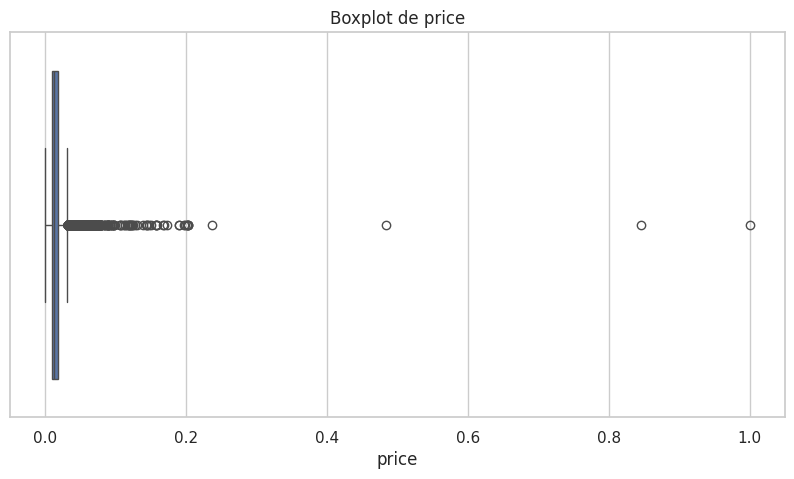

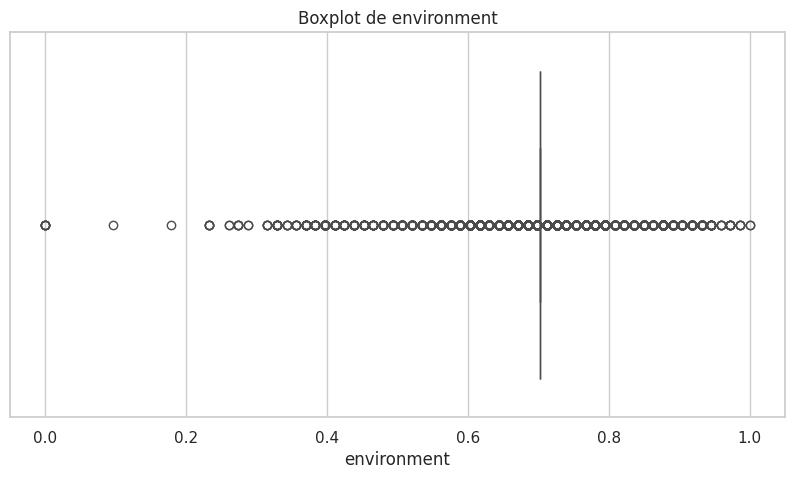

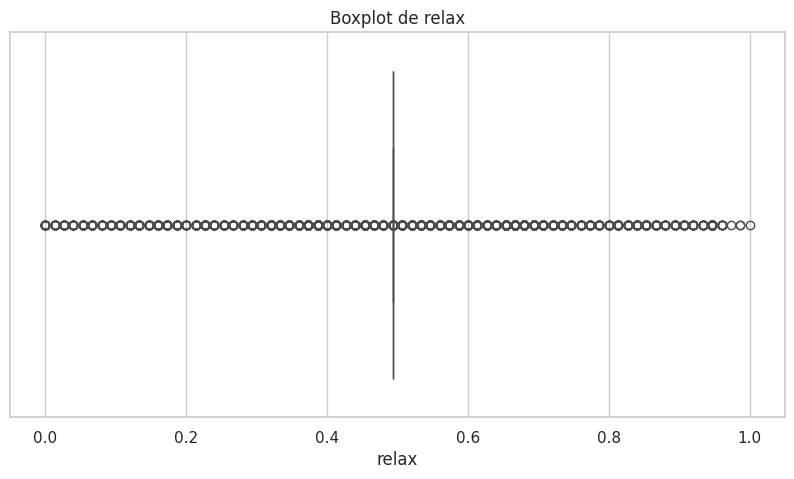

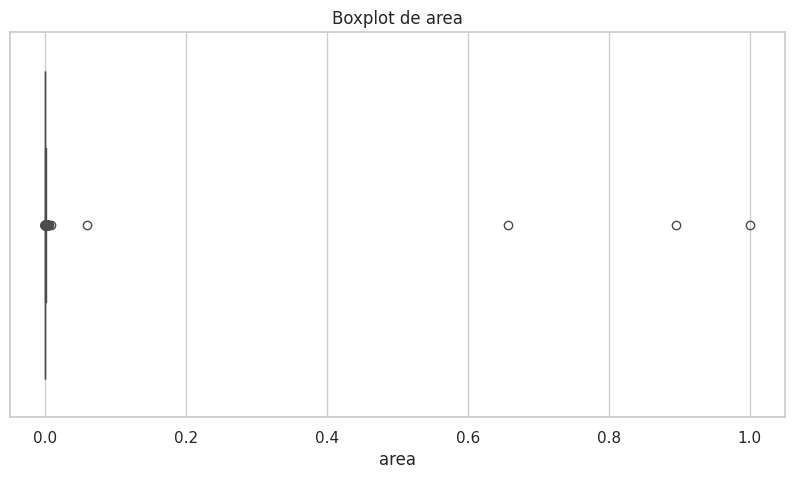

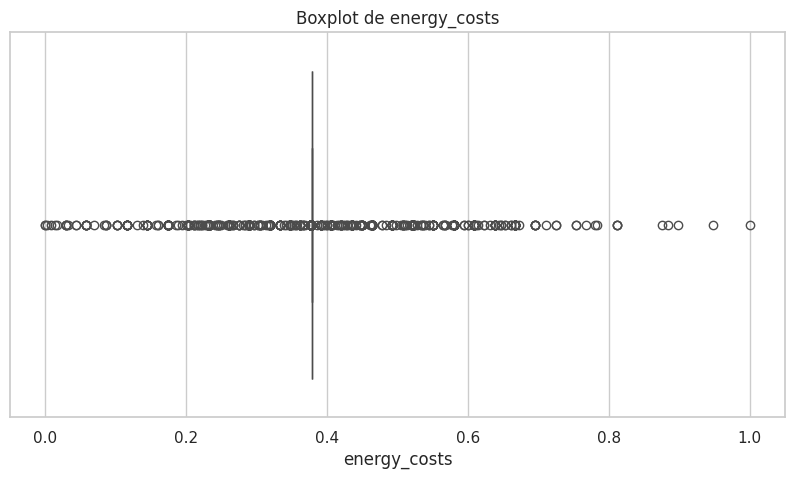

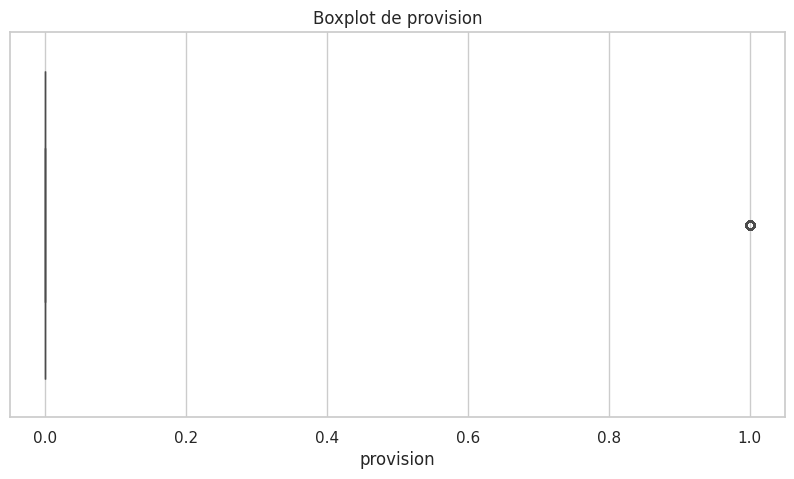

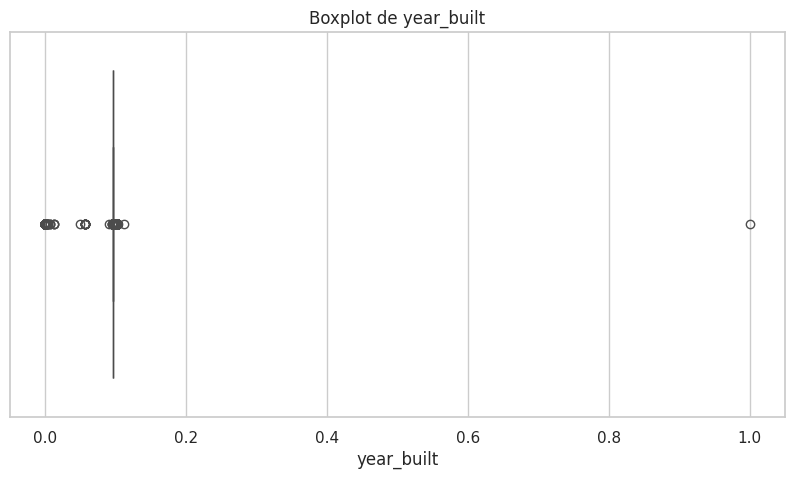

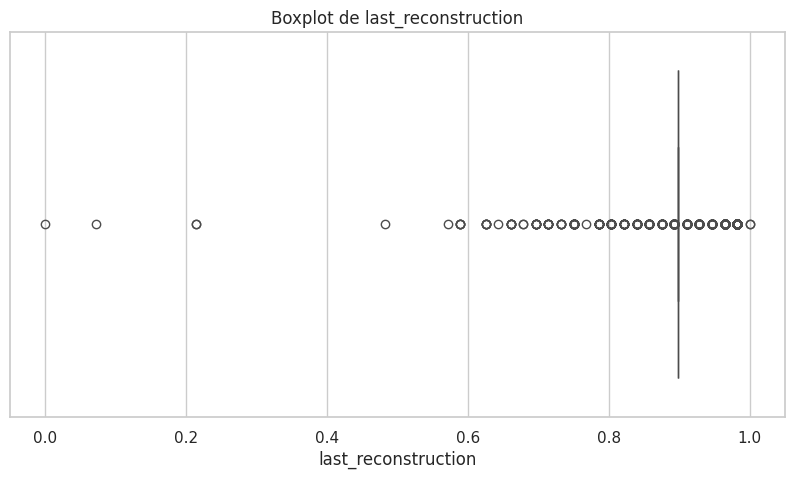

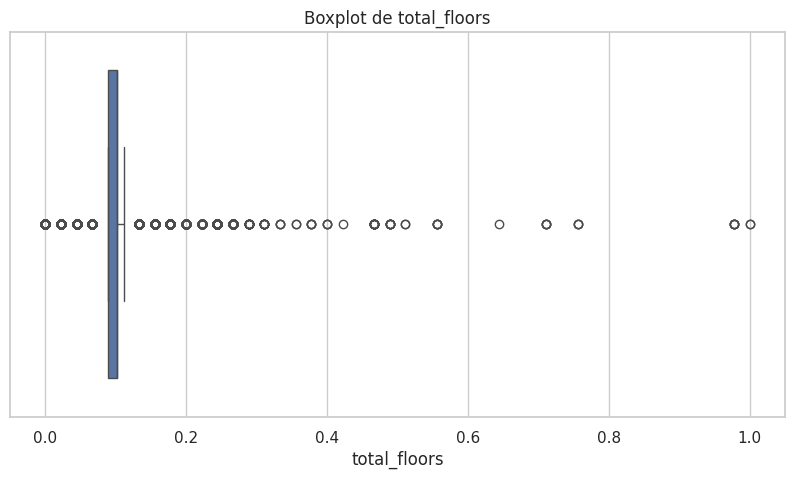

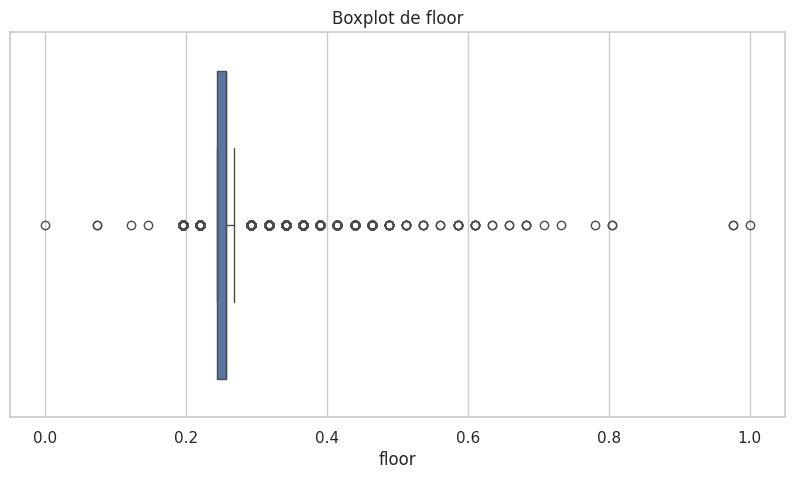

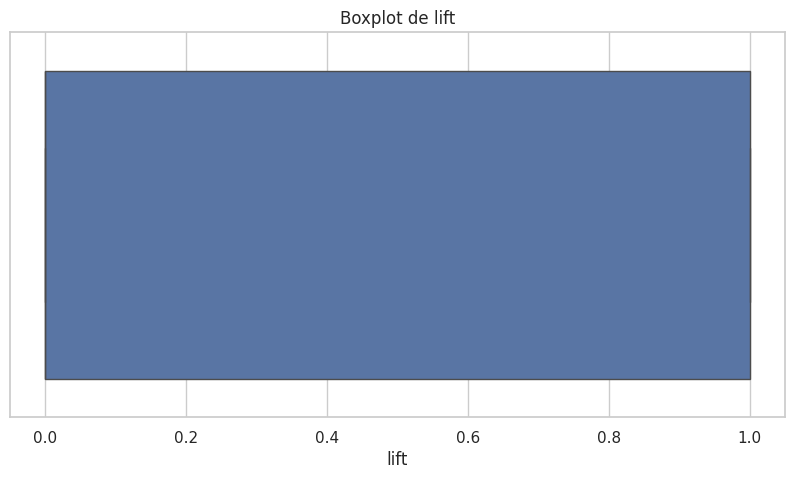

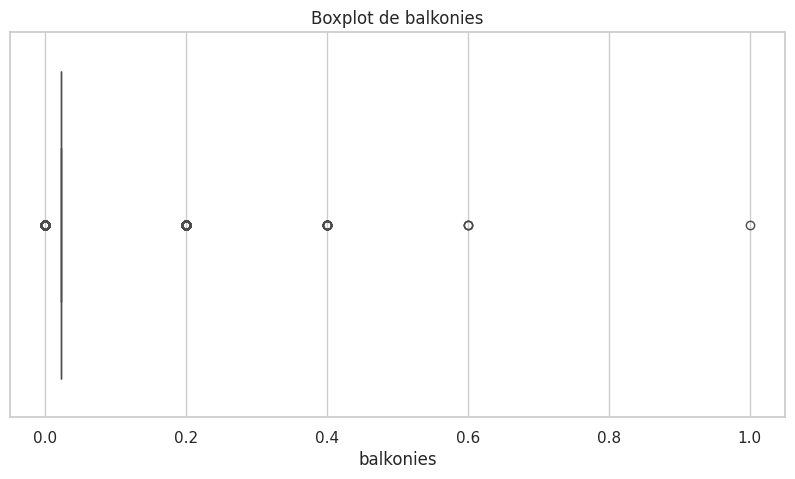

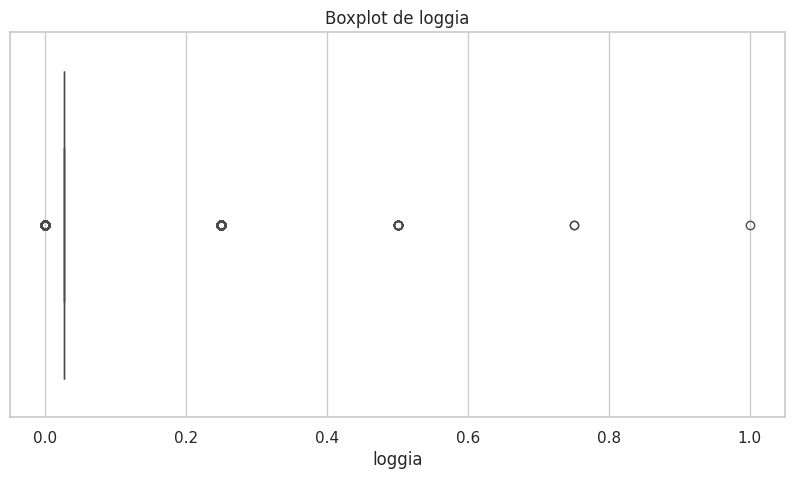

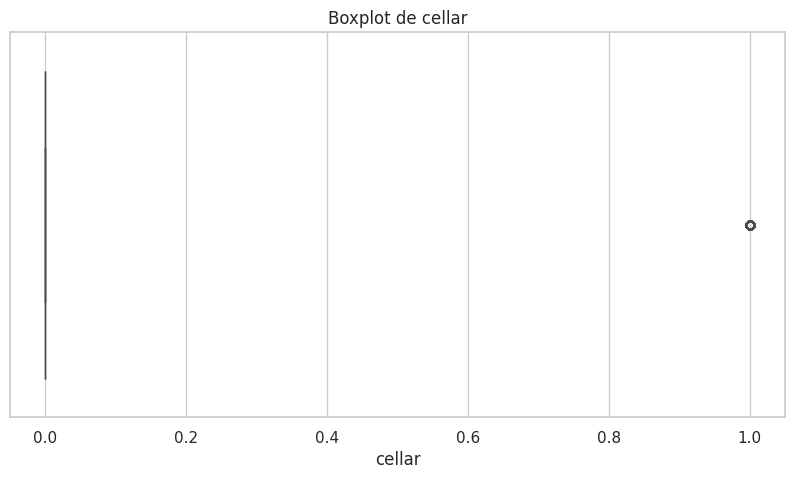

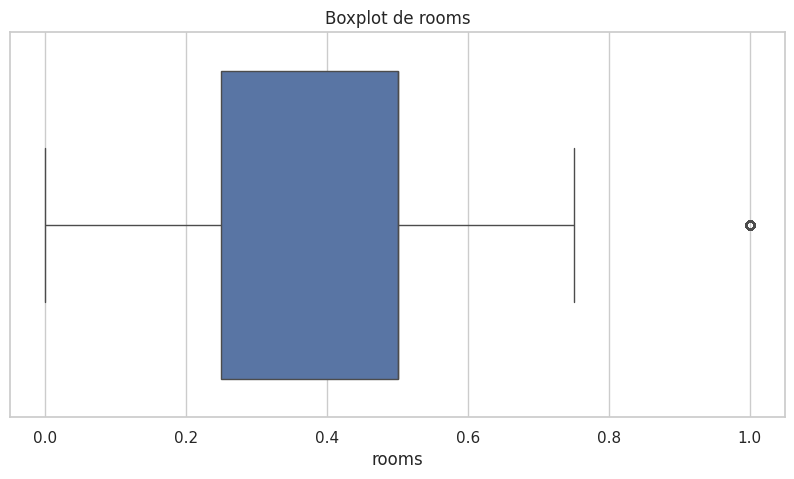

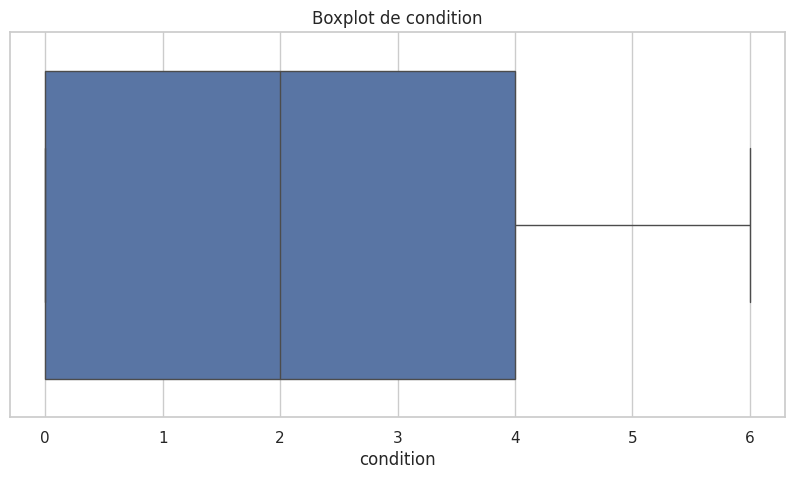

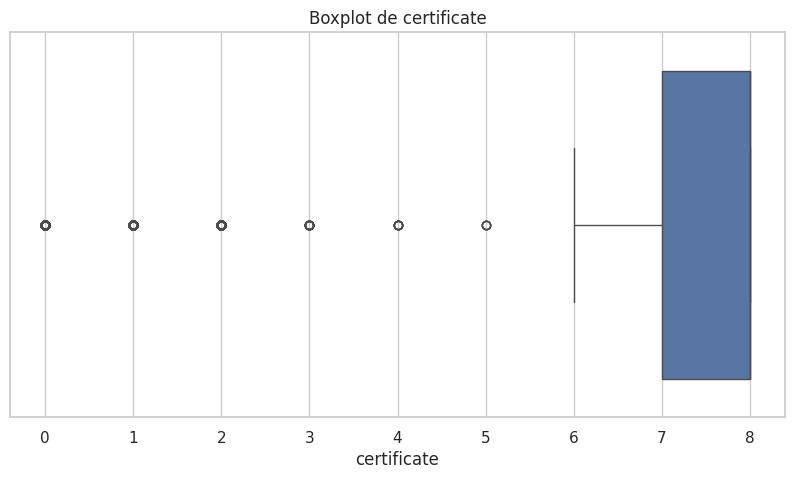

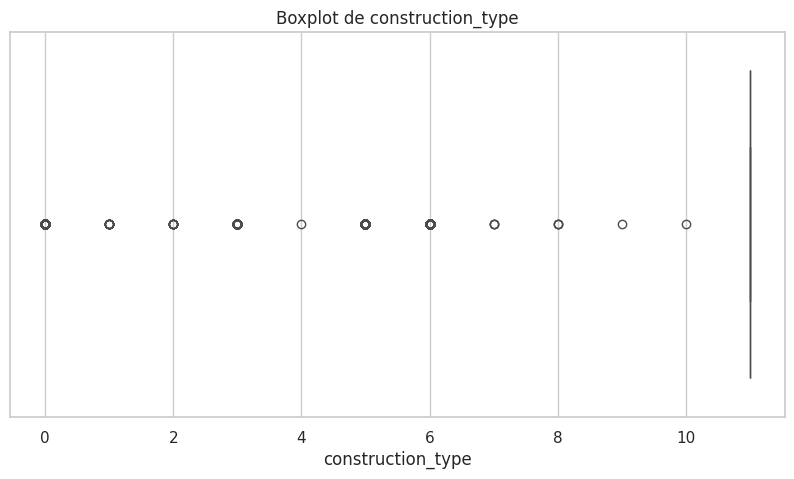

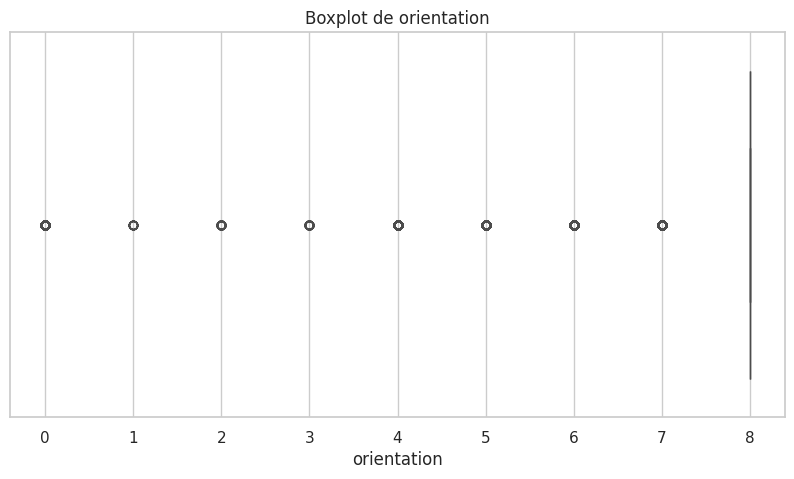

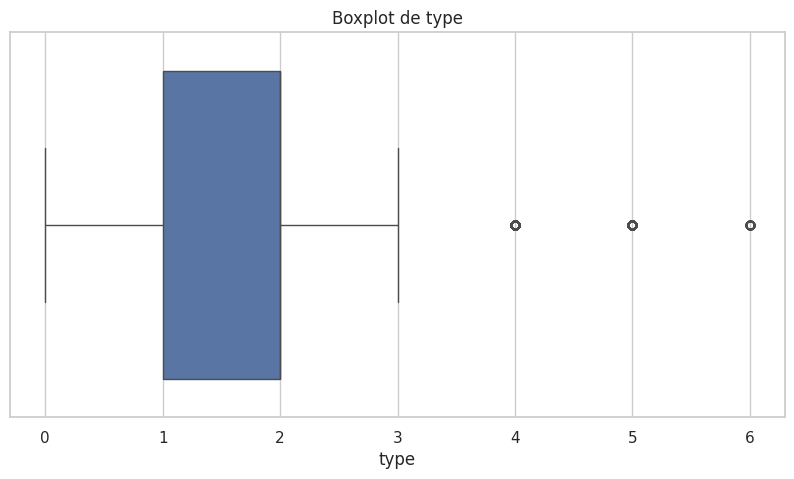

Número de outliers detectados por columna:
price                   880
index                  5162
environment            4132
quality_of_living      4132
safety                 4132
transport              4132
services               4132
relax                  4132
area                    627
energy_costs            980
provision              2411
year_built             3878
last_reconstruction     682
total_floors           6189
floor                  5864
lift                      0
balkonies              1767
loggia                 1520
cellar                  228
rooms                   147
condition                 0
certificate            2625
construction_type      2367
orientation            1023
type                    638
dtype: int64


In [ ]:
# 1. Visualizar outliers con boxplots
numeric_columns = C1.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = C1.select_dtypes(exclude=['float64', 'int64']).columns

numeric_data = C1[numeric_columns]

sns.set(style="whitegrid")
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=C1, x=column)
    plt.title(f'Boxplot de {column}')
    plt.show()

# 2. Detectar outliers usando el método IQR (Rango intercuartílico)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Obtenemos la cantidad de outliers detectados en cada columna
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers detectados por columna:")
print(outliers)

# Truncamos los outliers, los valores abajo del quantil minimo pasan al valor de este cuantil minimo,
# mientras que los que estan arriba del cuantil maximo pasan a tener el valor del cuantil maximo.
for column in numeric_columns:
  lower_limit = C1[column].quantile(0.15)
  upper_limit = C1[column].quantile(0.85)

  C1[column] = C1[column].clip(lower=lower_limit, upper=upper_limit)

In [ ]:
outliers_after_clipping = ((C1[numeric_columns] < (Q1 - 1.5 * IQR)) | (C1[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers detectados por columna después de la eliminación:")
print(outliers_after_clipping)

Número de outliers detectados por columna después de la eliminación:
price                     0
index                  3085
environment               0
quality_of_living      2629
safety                 2516
transport              2480
services               2497
relax                     0
area                      0
energy_costs              0
provision              2411
year_built             3316
last_reconstruction       0
total_floors           6189
floor                  3703
lift                      0
balkonies                 0
loggia                    0
cellar                    0
rooms                     0
condition                 0
certificate            2625
construction_type      2367
orientation               0
type                      0
dtype: int64


**7.** We make an EDA with the dataset's variables

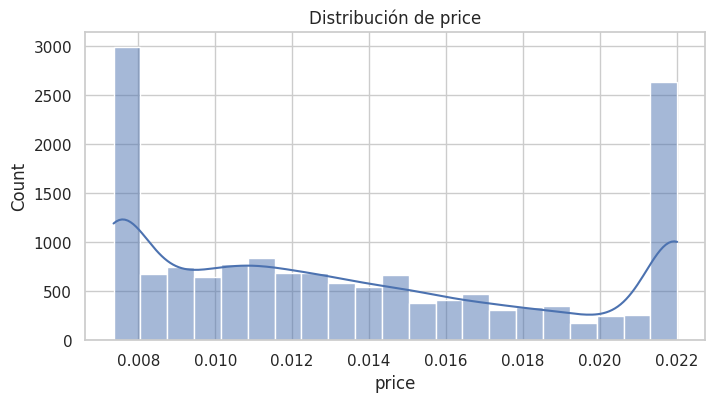

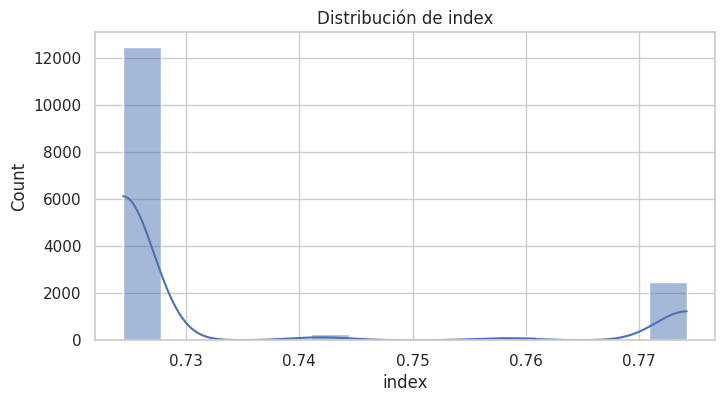

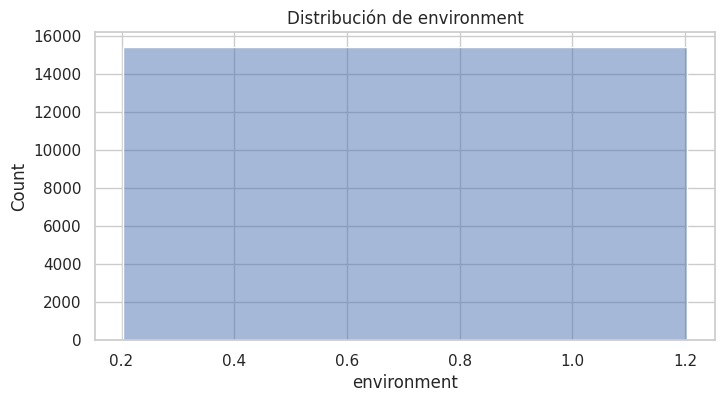

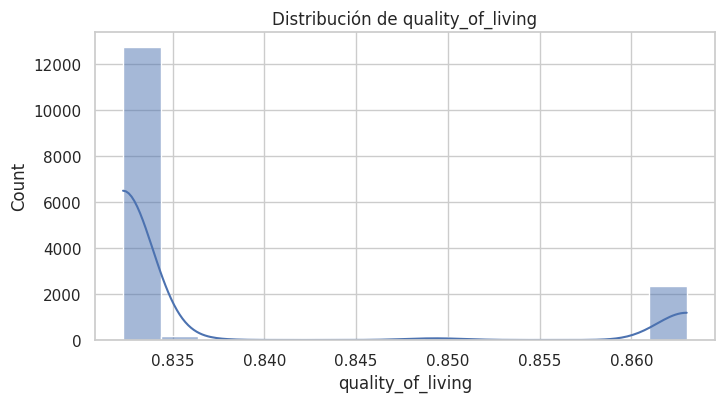

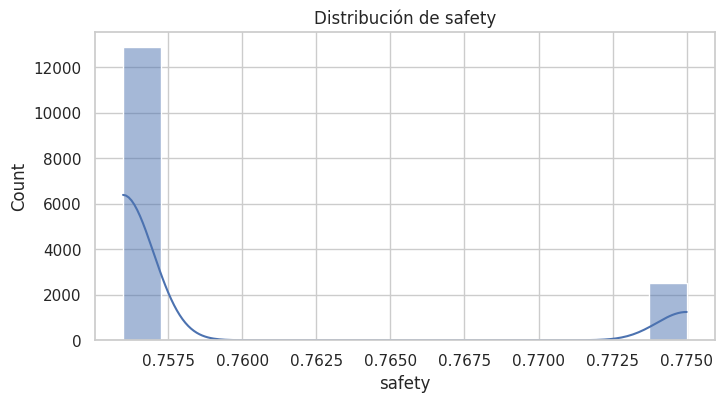

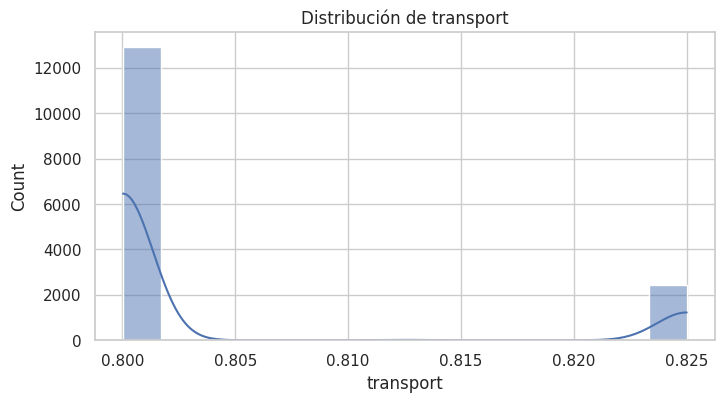

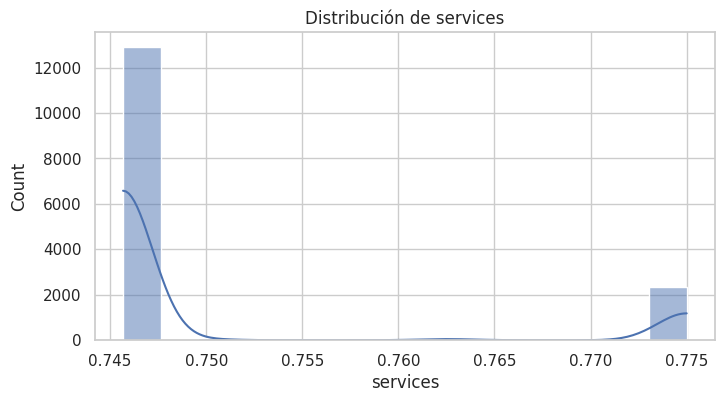

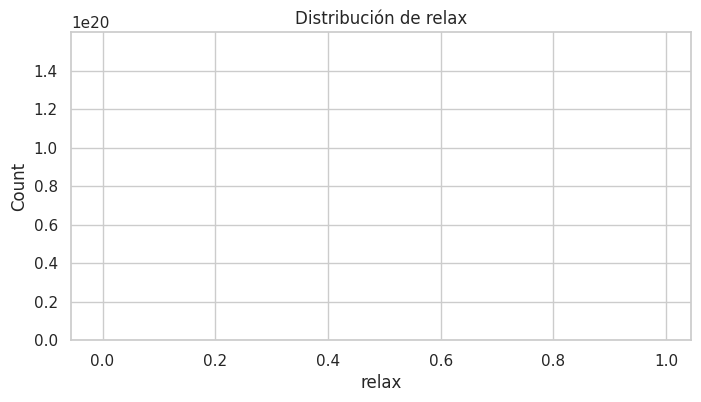

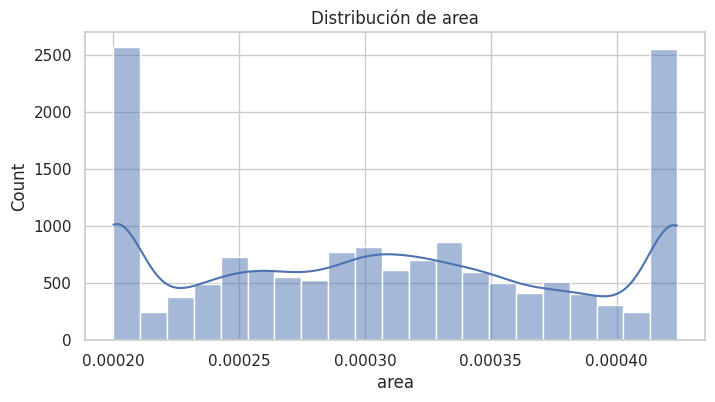

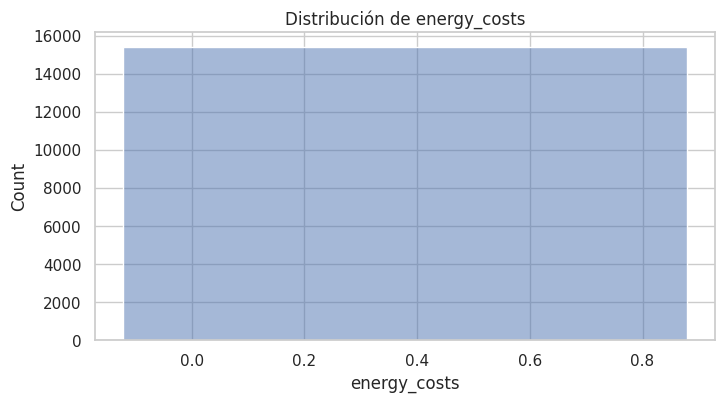

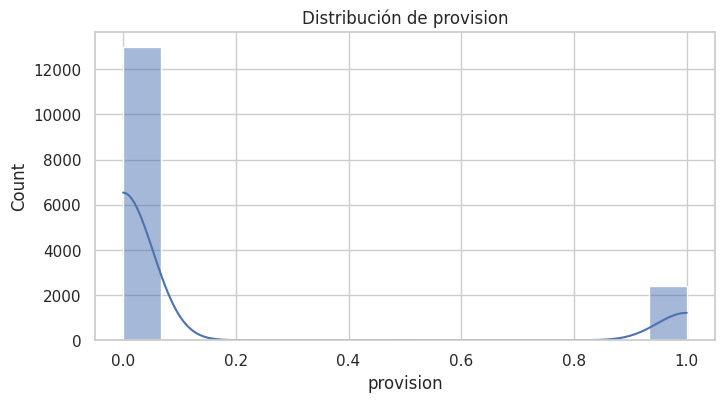

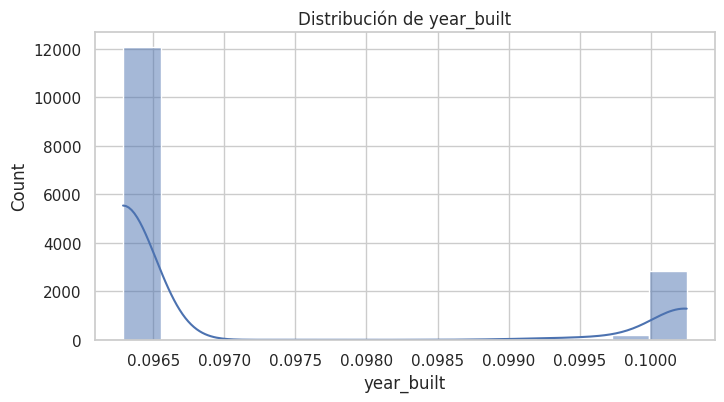

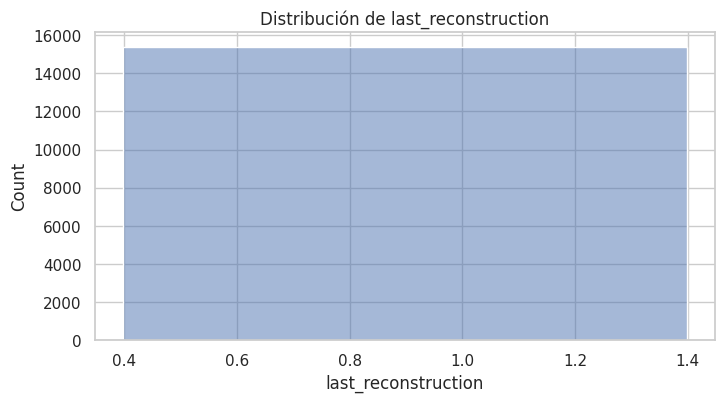

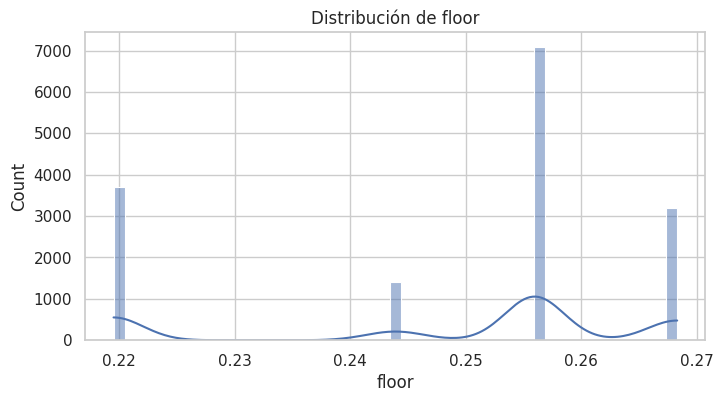

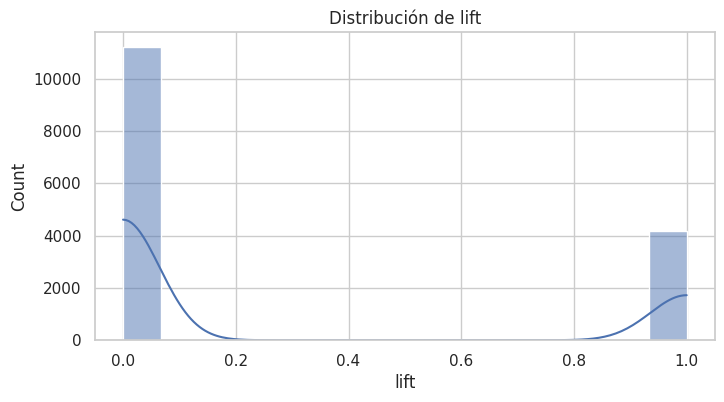

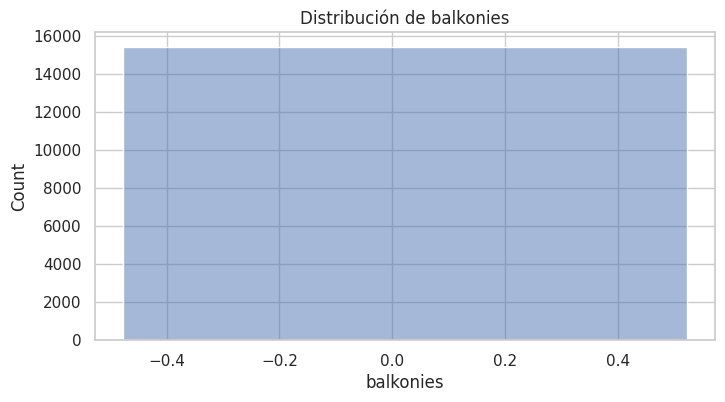

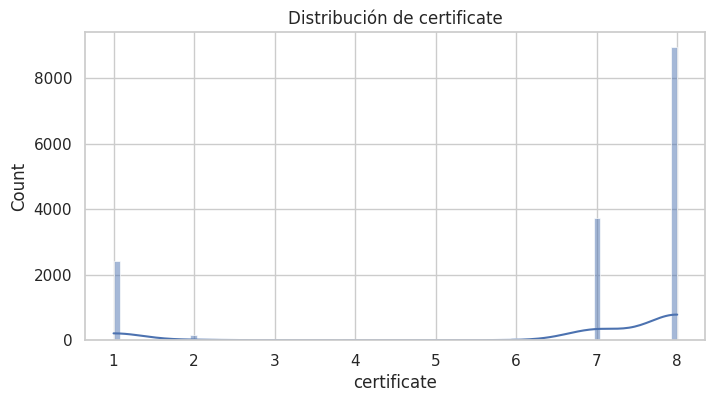

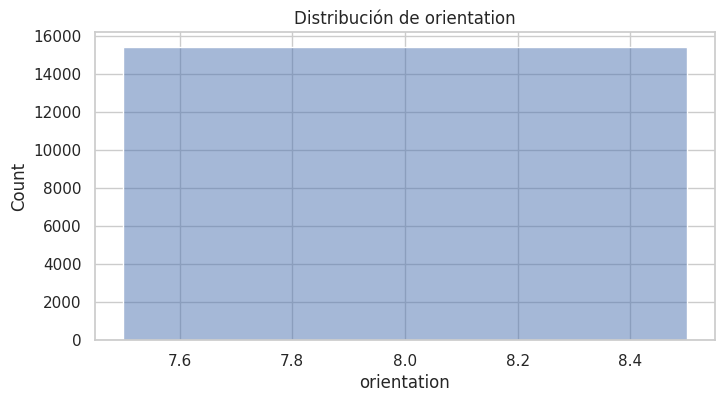

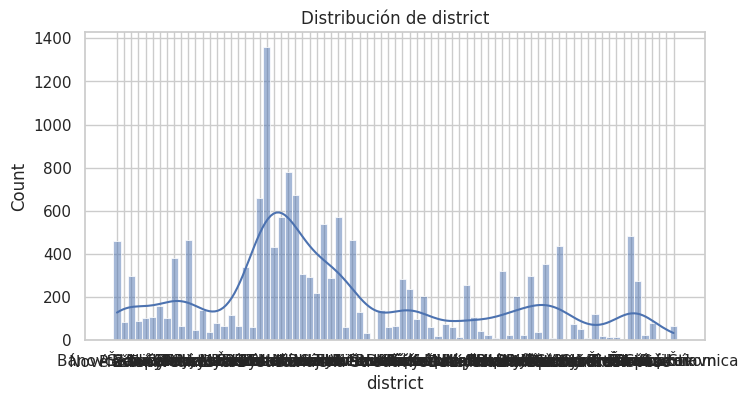

In [ ]:
# Con seaborn hacemos los histogramas de las variables del dataframe
for column in C1.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(C1[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

These histograms show widely separated values in most variables — in some cases because they are binary, and in others because there are only a few options to choose from. The variables price and area stand out, as they show a good distribution, although there are spikes at the extremes, which could be due to the outlier truncation performed in step 6. Another factor to consider is that missing values were filled with the mean of each column. If there were too many missing values, replacing them could cause most of the data in that column to cluster around the same value.

Additionally, the distributions for apartment cities and districts are shown, but they are not very meaningful at this point, as the column contains too many unique values to visualize clearly.

In [ ]:
# Hacemos diagramas de dispersion con bokeh
numeric_columns = C1.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    p = figure(title=f'Scatter plot of {col}', x_axis_label='Index', y_axis_label=col)
    p.scatter(C1.index, C1[col], size=8, color="navy", alpha=0.5)
    show(p)

These scatter plots similarly show that, in most cases, the variables are binary or concentrated within certain value ranges. The only variables with a more widespread distribution are price and area, where many scattered points can be observed.

In [ ]:
# Hacemos un diagrama de violín para ver los datos de otra manera
for col in C1.columns:
    fig = px.violin(C1, y=col, box=True, points="all")

    fig.update_layout(title=f'Violin plot of {col}', yaxis_title=col)

    fig.show()

These violin plots clearly show the distribution of the data for each variable.

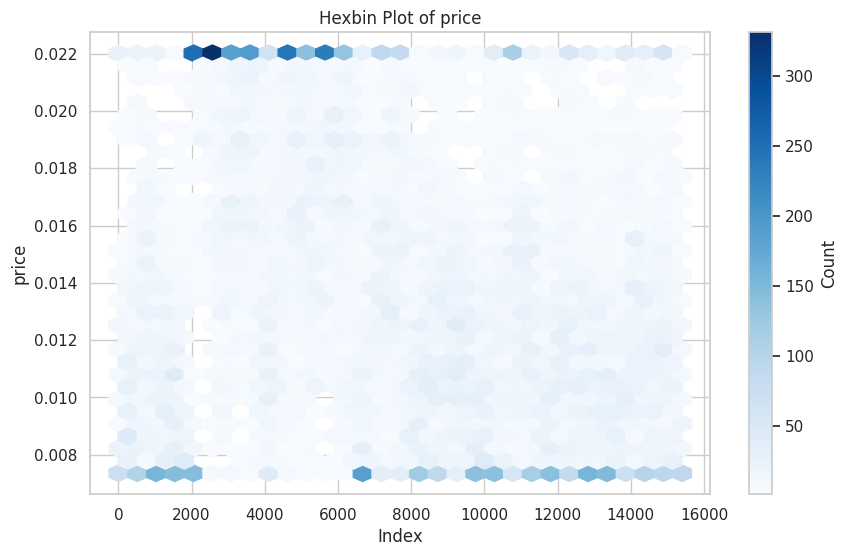

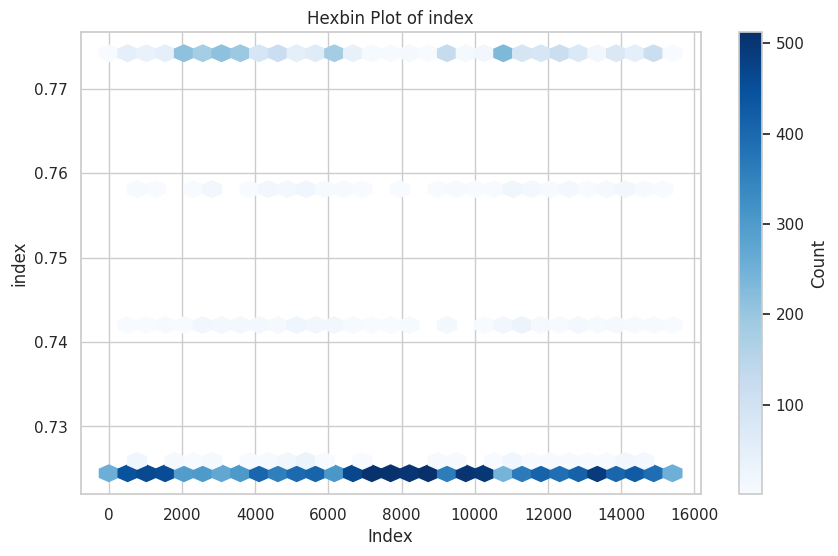

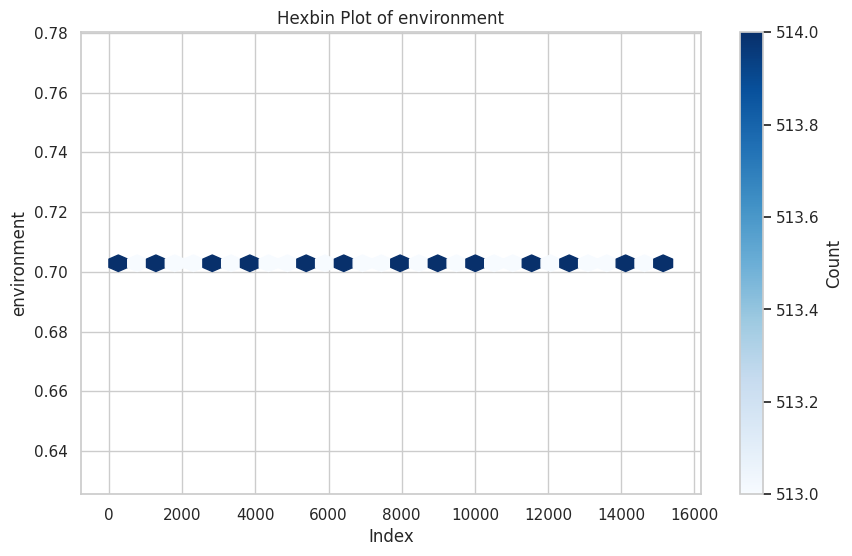

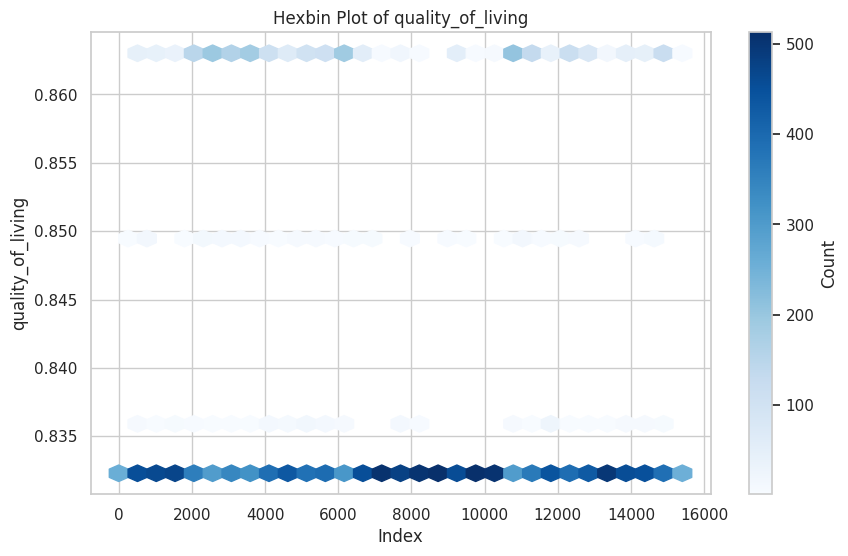

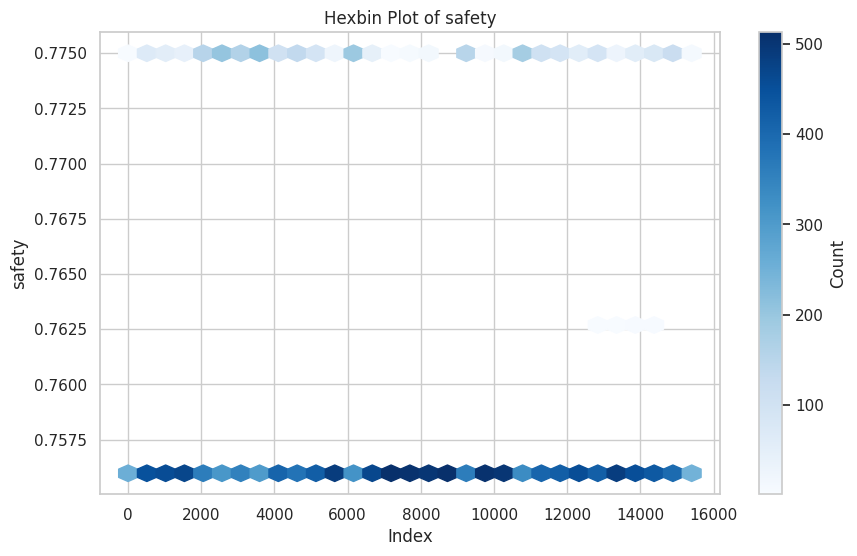

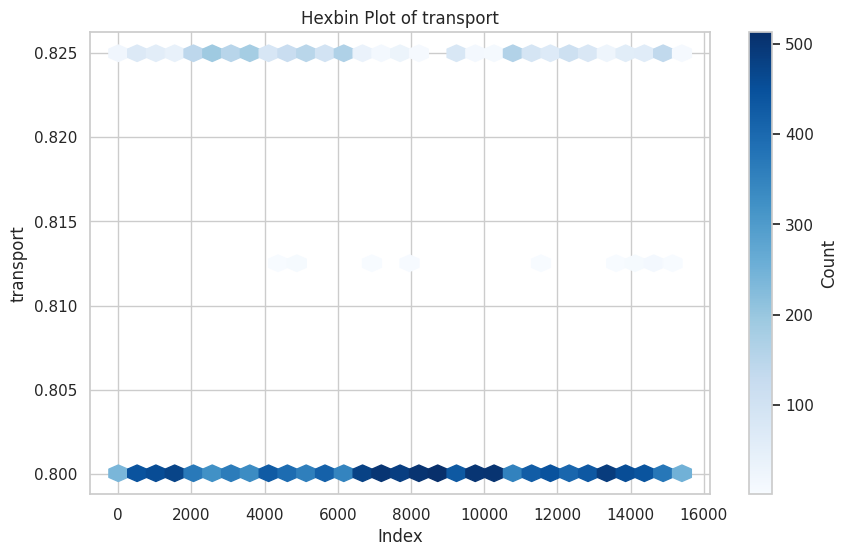

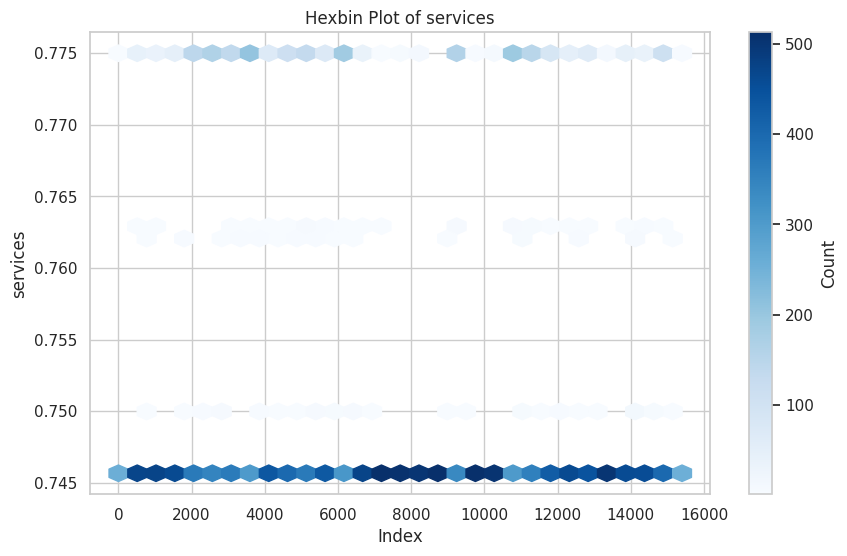

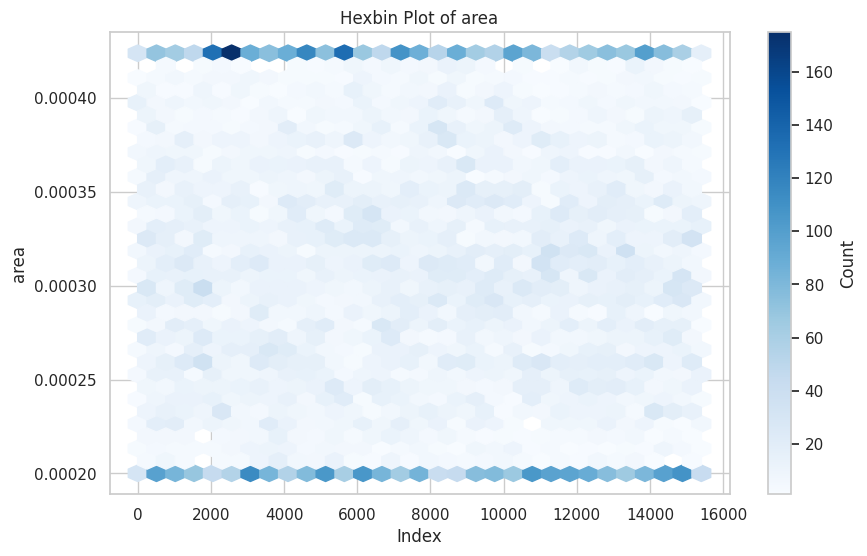

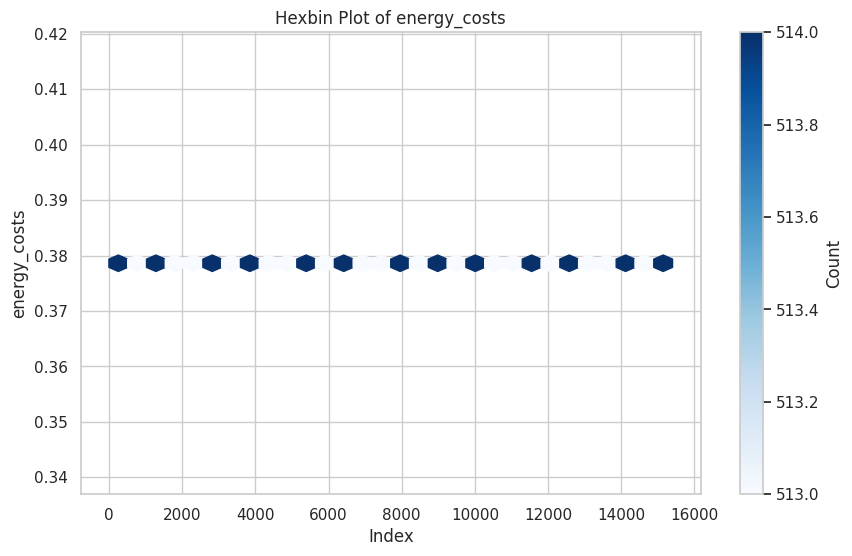

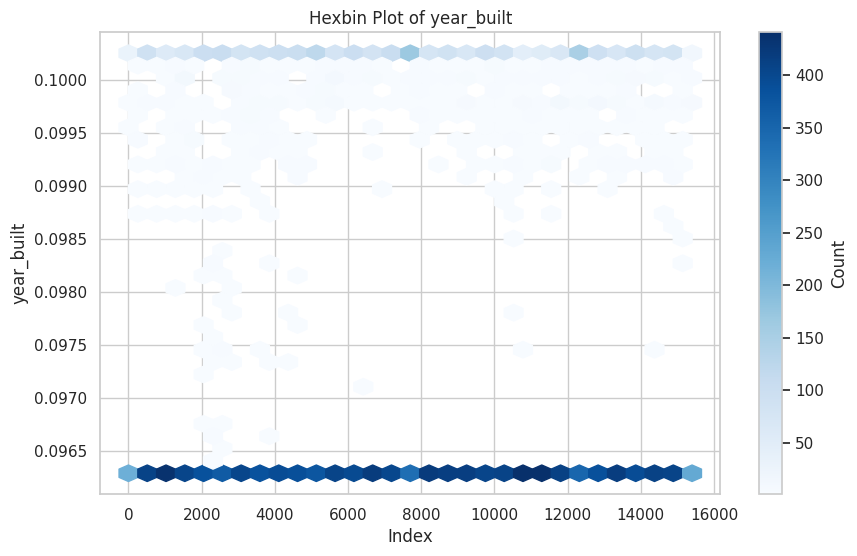

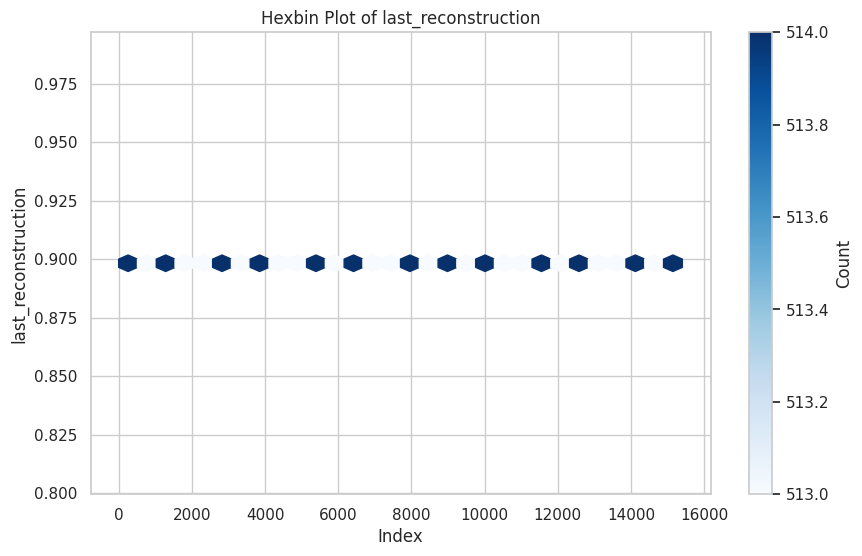

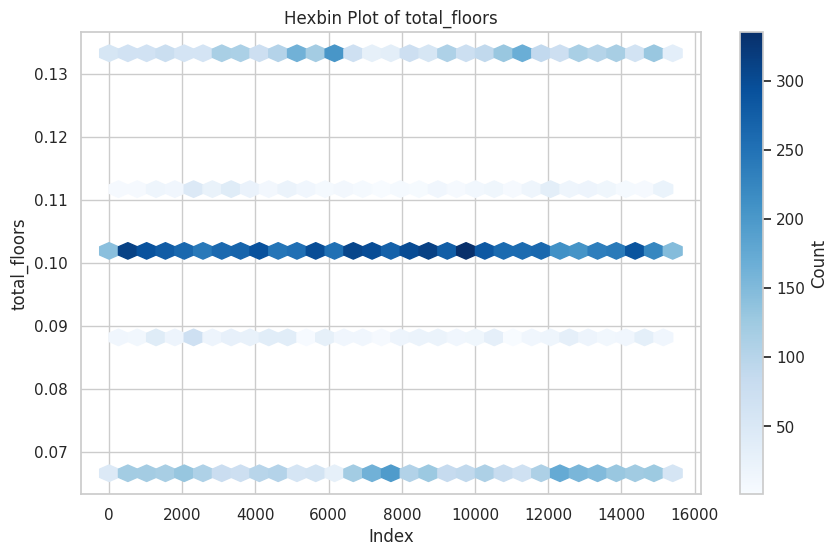

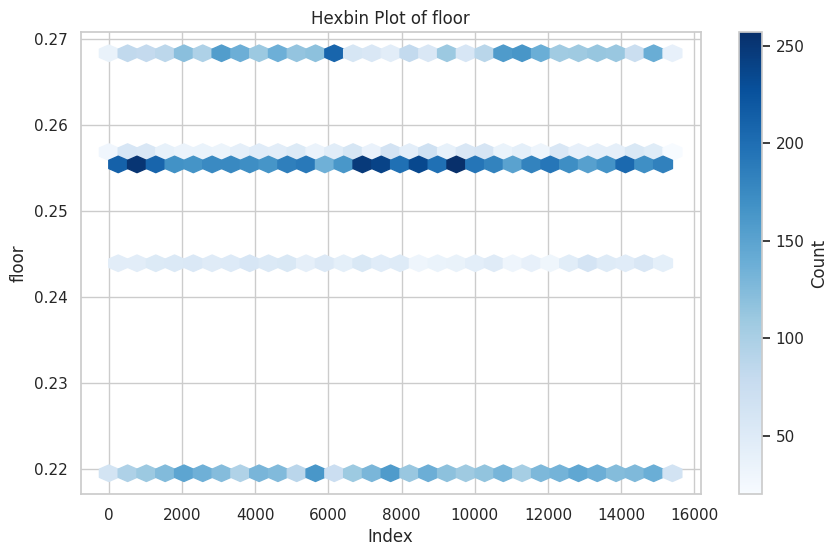

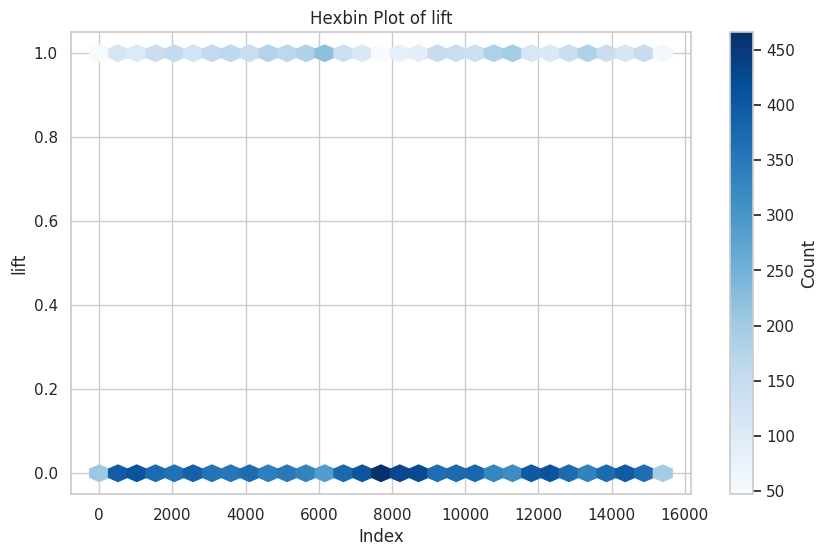

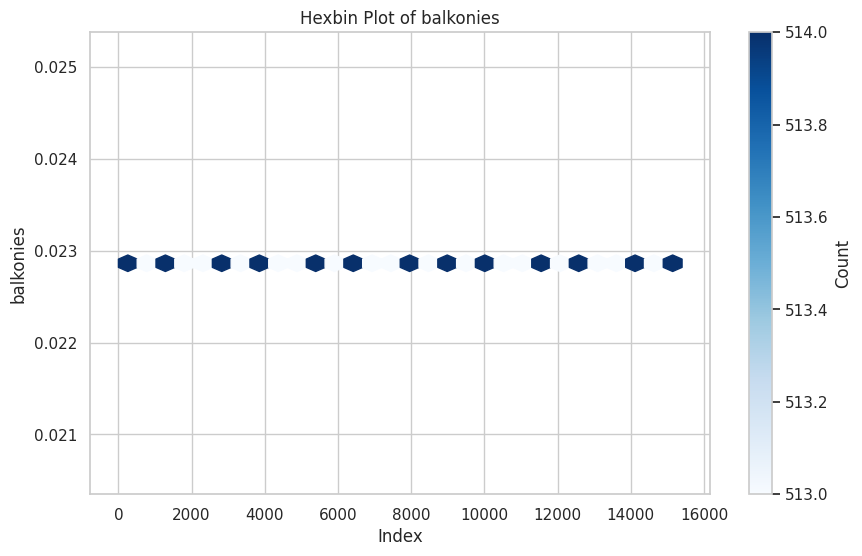

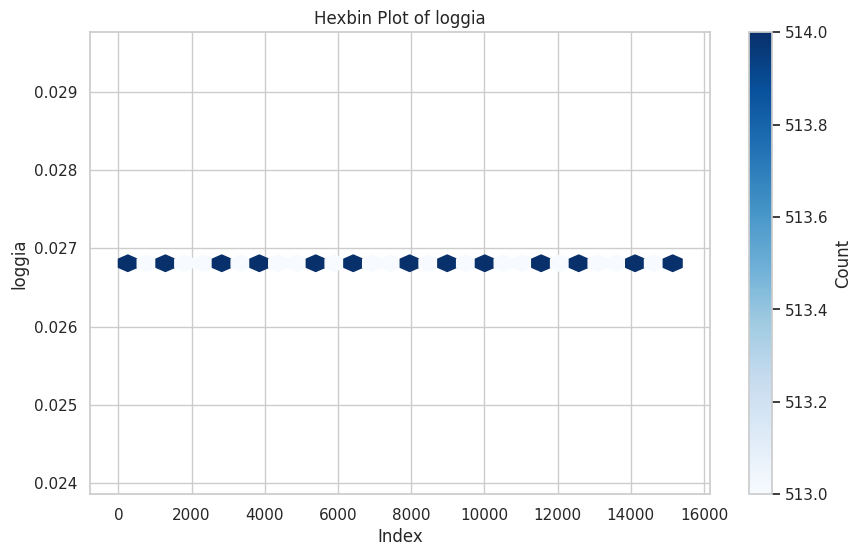

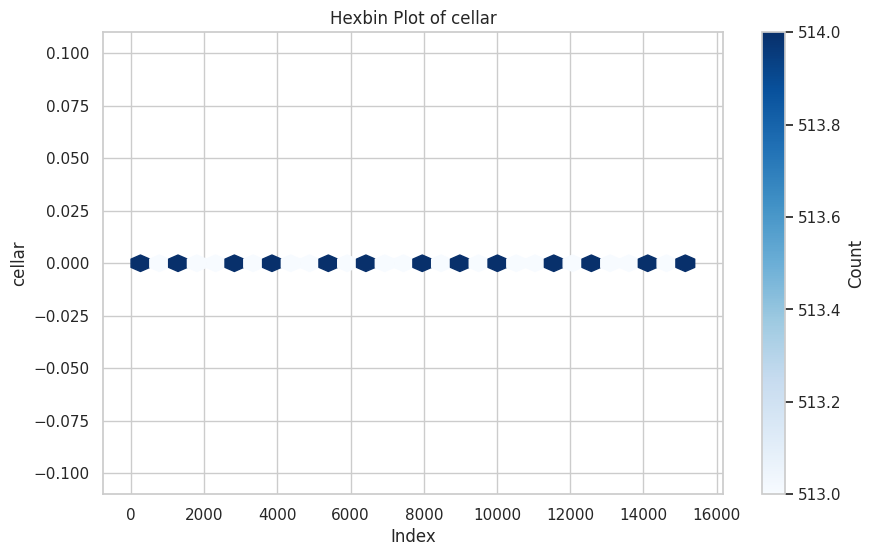

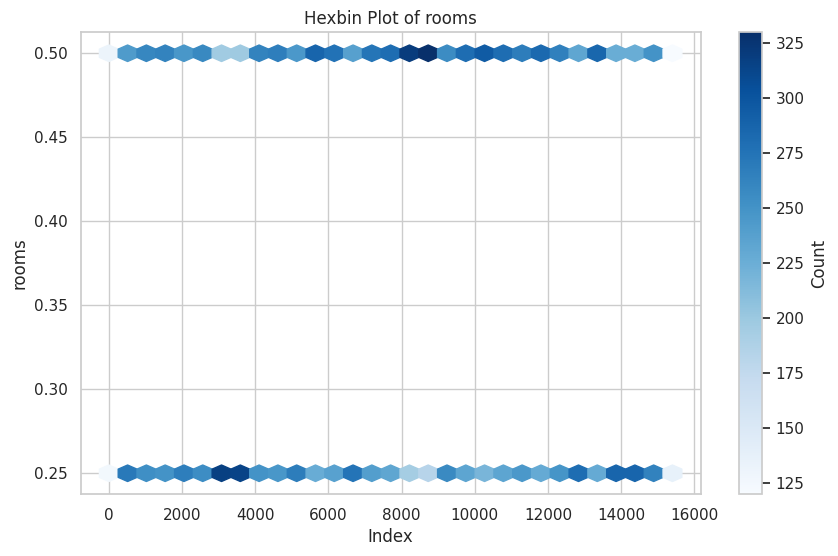

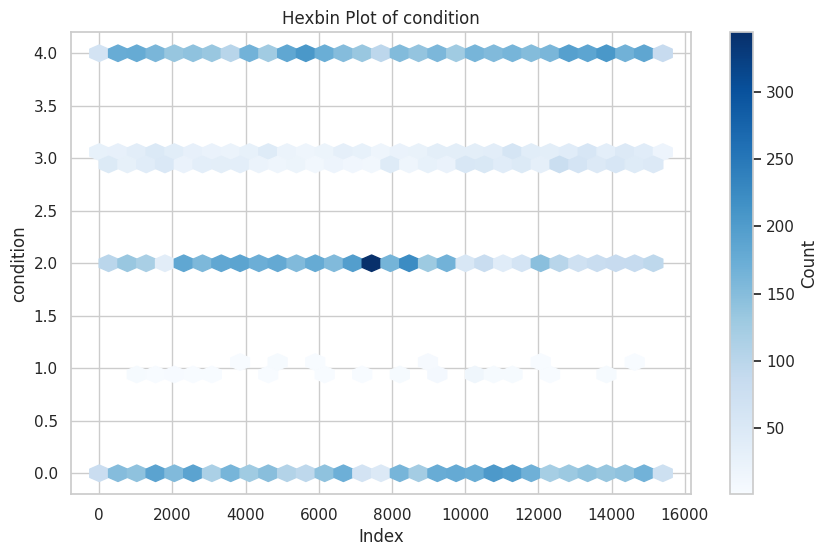

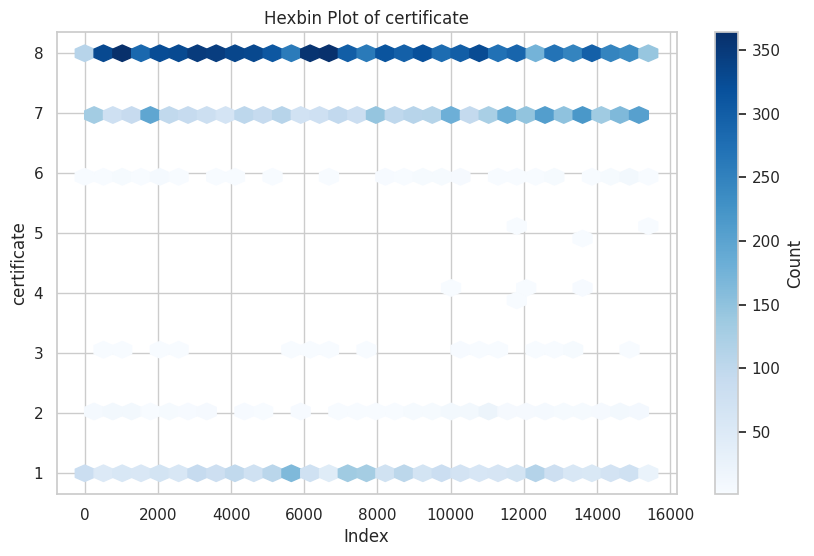

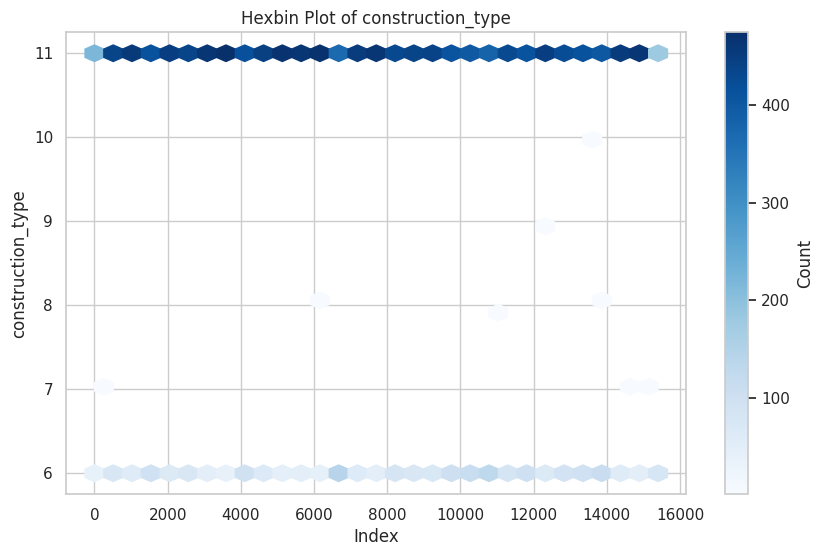

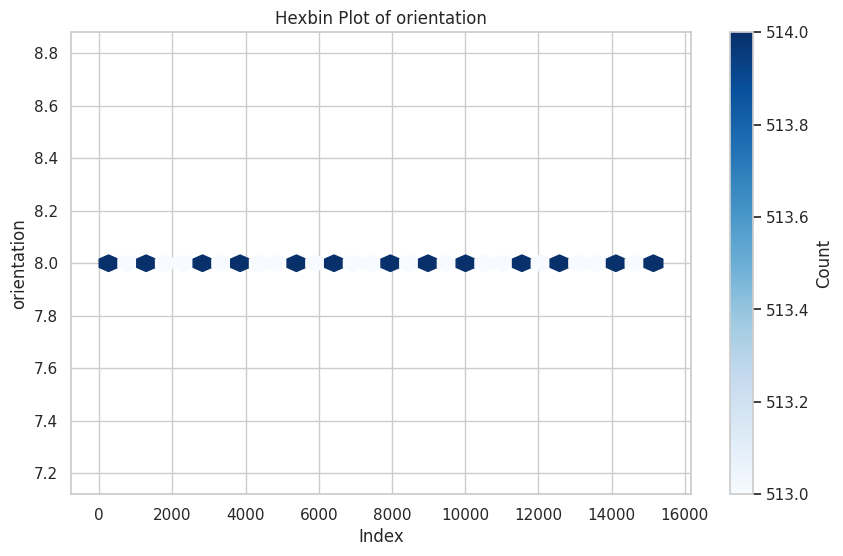

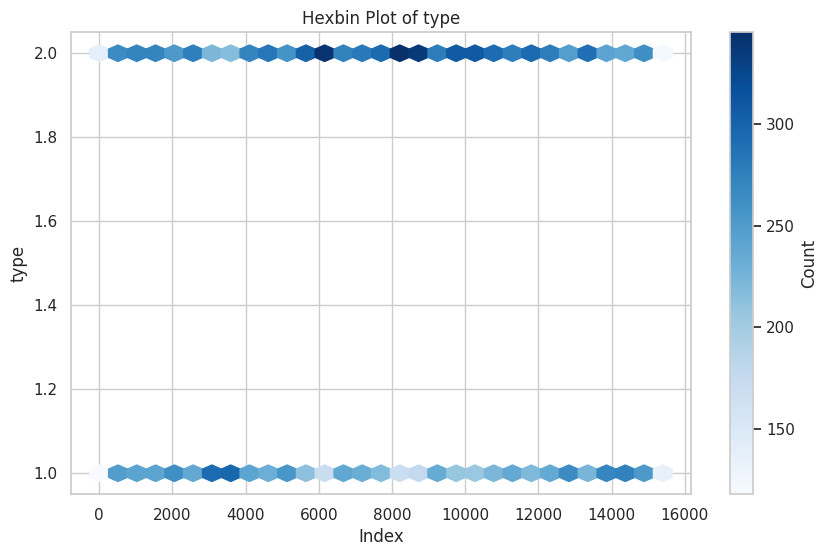

In [ ]:
# Matplotlib es una libreria muy utilizada para graficacion, es altamente compatible con python
# Creamos con matplotlib una grafica hexbin
numeric_columns = C1.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hexbin(C1.index, C1[column], gridsize=30, cmap='Blues', mincnt=1)
    plt.colorbar(label='Count')
    plt.title(f'Hexbin Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

A very similar pattern is observed to what was found in the previous plots.

**8.** A correlation analysis is carried out between the numerical variables in the dataset and visualized using a heatmap.

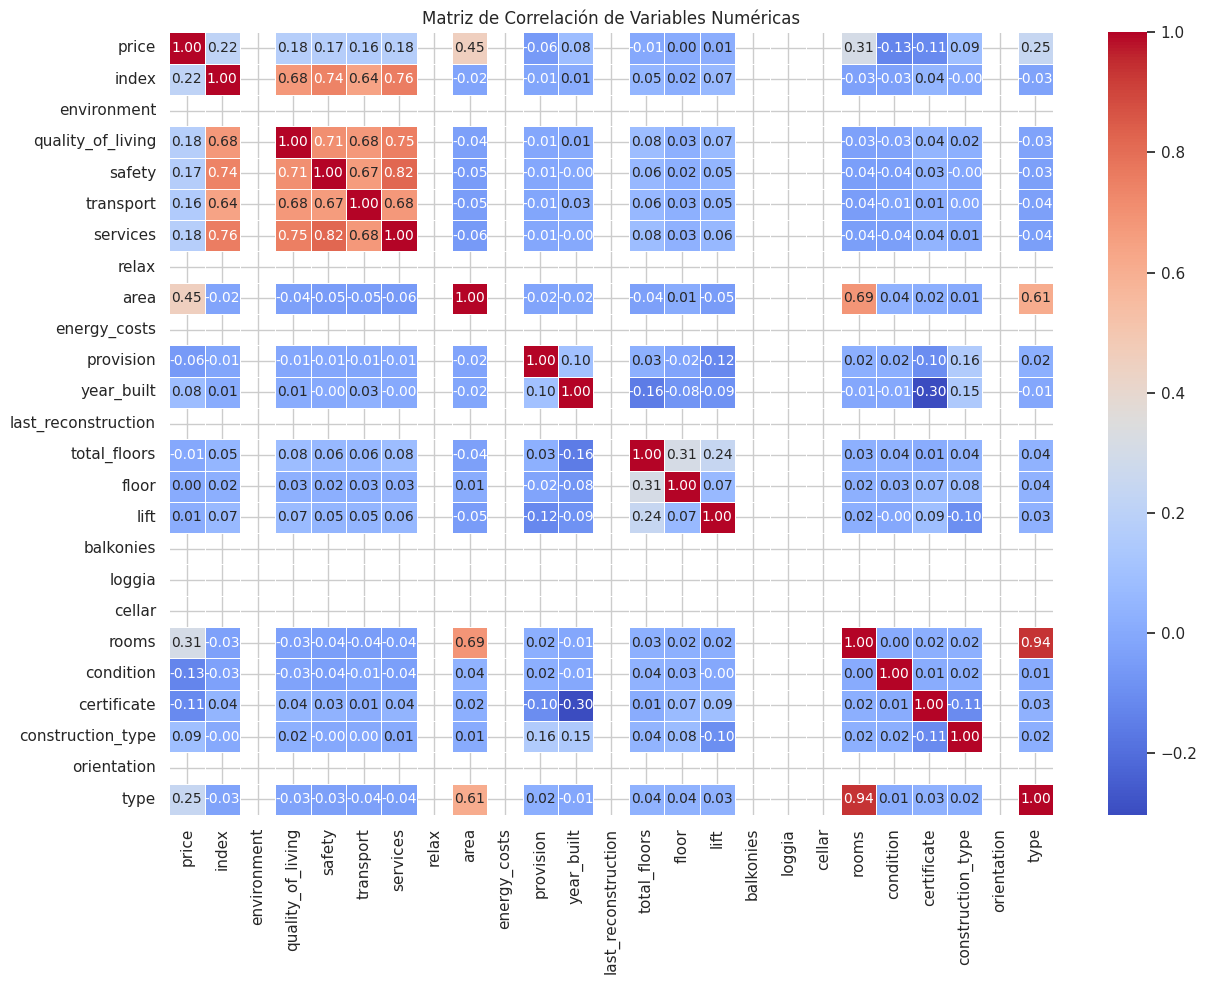

In [ ]:
# Selecciona solo las columnas numéricas
numeric_data = C1.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
correlation_matrix = numeric_data.corr()

# Configura el tamaño del gráfico de acuerdo a lo que necesitemos
plt.figure(figsize=(13, 10))

# Crea el heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

# Título del gráfico
plt.title('Matriz de Correlación de Variables Numéricas')

plt.tight_layout()

# Muestra el gráfico
plt.show()

The generated heatmap reveals several correlations. First, there is a moderate correlation between area and price, which makes sense as it reflects the relationship between the apartment's size in square meters and its price. A fairly strong correlation can also be seen between the index variable and quality_of_living, safety, transport, and services. Since index represents a livability score, it is logical that it correlates with quality of life, safety, transport, and service availability.

Additionally, correlations are observed among these four variables. There is also a correlation between area and both rooms and type. Rooms is a numeric value representing the number of rooms, while type describes the apartment layout—e.g., 2-room, 3-room, or studio. The strongest correlation is between type and rooms, which is expected since both describe the same feature of the apartment in different ways.

9. Polars is a data manipulation library that, based on our research, stands out for its high speed and efficiency when handling large volumes of data.**

**Advantages over Pandas**

*   Performance: Polars is built in Rust, a programming language known for its efficiency. This allows it to process data significantly faster than Pandas, especially with large datasets.
*   Parallelism: Polars takes advantage of parallel execution, allowing it to run operations concurrently and improve performance on multi-core machines.
*   Memory Usage: Polars manages memory more efficiently than Pandas, which is especially useful when working with large datasets.
*   Interface: Although there are some differences, Polars offers an API similar to Pandas, making the transition easier for users already familiar with Pandas.

Polars can be installed using the following command:

In [ ]:
!pip install polars

After installing it, an initial exploration of the data is done with Polars:

In [ ]:
import polars as pl

# Carga el dataset utilizando Polars
realEstate_pl = pl.read_csv('/content/drive/MyDrive/LabsUlisesMarcel/Lab1/Dataset/Original.csv', separator=';')

# Muestra las primeras filas
print(realEstate_pl.head())

# Descripción estadística
print(realEstate_pl.describe())

# Cuenta valores nulos
print(realEstate_pl.null_count())

shape: (5, 27)
┌──────────┬────────┬───────┬─────────────┬───┬────────┬──────────────────┬───────┬────────────┐
│ name_nsi ┆ price  ┆ index ┆ environment ┆ … ┆ cellar ┆ type             ┆ rooms ┆ district   │
│ ---      ┆ ---    ┆ ---   ┆ ---         ┆   ┆ ---    ┆ ---              ┆ ---   ┆ ---        │
│ str      ┆ i64    ┆ str   ┆ str         ┆   ┆ i64    ┆ str              ┆ i64   ┆ str        │
╞══════════╪════════╪═══════╪═════════════╪═══╪════════╪══════════════════╪═══════╪════════════╡
│ Semerovo ┆ 42000  ┆ NA    ┆ NA          ┆ … ┆ 0      ┆ 3-room apartment ┆ 3     ┆ Nové Zámky │
│ Semerovo ┆ 42000  ┆ NA    ┆ NA          ┆ … ┆ 0      ┆ 3-room apartment ┆ 3     ┆ Nové Zámky │
│ Štúrovo  ┆ 107000 ┆ 8,3   ┆ NA          ┆ … ┆ 0      ┆ 1-room apartment ┆ 1     ┆ Nové Zámky │
│ Štúrovo  ┆ 105000 ┆ NA    ┆ NA          ┆ … ┆ 0      ┆ 3-room apartment ┆ 3     ┆ Nové Zámky │
│ Štúrovo  ┆ 82000  ┆ NA    ┆ NA          ┆ … ┆ 0      ┆ 2-room apartment ┆ 2     ┆ Nové Zámky │
└──────────┴───

Now, the performance between Polars and Pandas is measured using `%timeit`

In [ ]:
# Medición con Pandas
%timeit realEstate_pd = pd.read_csv('/content/drive/MyDrive/LabsUlisesMarcel/Lab1/Dataset/Original.csv', sep=';', on_bad_lines='skip')

# Medición con Polars
%timeit realEstate_pl = pl.read_csv('/content/drive/MyDrive/LabsUlisesMarcel/Lab1/Dataset/Original.csv', separator=';')

179 ms ± 59.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
55 ms ± 5.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Exploratory Data Analysis (EDA) of the Dataset

This report presents an exploratory data analysis of the selected dataset.

Before proceeding with the requested steps, the notebook is granted permission to access Google Drive, and all necessary libraries are loaded.

## 1. Load Dataset:
Data was loaded from Google Drive and GitHub using pandas; both methods allow reading a CSV file. This step ensures that the dataset can be manipulated and visualized within the notebook. The chosen dataset contains a listing of apartments in Slovakia, with various data for each.

## 2. Initial Data Exploration:
Basic pandas functions such as `head()`, `tail()`, `info()`, and `describe()` were used to understand the data structure. This helps identify how many rows and columns the dataset has, the data types of each column, and if there are any null values. Additionally, numeric values using commas as decimal points were corrected to use periods.

## 3. Handling Null Values:
Three strategies were implemented to handle missing values:

- Replace null values with zeros.
- Replace null values with the mean in numeric columns and with "unknown" in categorical columns.
- Remove rows containing null values.

Execution times were measured, and the most efficient option was removing rows; however, this resulted in an empty dataset, indicating that all rows had null values. The other two options were useful to handle nulls without losing data.

## 4. Data Normalization and Scaling:
Numeric columns were selected and two scaling techniques were applied:

- MinMaxScaler to normalize values between 0 and 1.
- StandardScaler to scale data to a distribution with mean 0 and standard deviation 1.

The resulting datasets (B1 and B2) contain the normalized and scaled data respectively, while the original categorical columns were preserved.

## 5. Encoding Categorical Variables:
Initially, One Hot Encoding was applied to all categorical columns, but this resulted in a dataset with over 700 columns due to the high number of unique values in the `name_nsi` and `district` columns. This approach was impractical.

Instead, Label Encoding was applied to five of the categorical columns: `condition`, `certificate`, `construction_type`, `orientation`, and `type`. These columns had a manageable number of unique values, making Label Encoding more appropriate.

## 6. Outlier Detection:

### Visualizing Outliers with Boxplots
Outliers in numeric columns were first visualized using boxplots. Boxplots help identify outliers by showing values outside the interquartile range (IQR).

- Numeric columns were selected.
- Boxplots were generated for each numeric column to visually show outliers.

### Detecting Outliers Using the IQR Method
Next, the Interquartile Range (IQR) method was used for quantitative outlier detection. Outlier limits are defined as values below \( Q1 - 1.5 \times IQR \) or above \( Q3 + 1.5 \times IQR \), where \( Q1 \) and \( Q3 \) are the 25th and 75th percentiles respectively.

- Values of Q1, Q3, and IQR were calculated for each numeric column.
- The number of outliers in each column was counted.

### Handling Outliers by Clipping
Outliers were handled using clipping. Values below the lower quantile were set to the minimum quantile value, and those above the upper quantile were set to the maximum quantile value.

- Clipping limits were set based on the 0.15 and 0.85 quantiles for each numeric column.
- The `clip()` function was applied to restrict values within these bounds, reducing the effect of outliers.

Outliers were recounted after clipping to verify effectiveness.

## 7. Exploratory Data Analysis (EDA):
Various types of graphs were created to describe the data in each column of the dataset. Many variables showed very scattered data, likely due to a high number of null values and their subsequent replacement with the mean. Additionally, several variables were binary, which made graphical descriptions less informative. The only variables with somewhat broader distributions were `price` and `area`, as well as the categorical variables `name_nsi` and `district` which describe apartment locations. Libraries used include Bokeh, Seaborn, Plotly, and Matplotlib.

## 8. Correlation Analysis:
To understand relationships between numerical variables, a correlation analysis was performed, which helps identify how one variable changes relative to another.

### Correlation Matrix Calculation
- Only numerical columns were selected.
- The `.corr()` method was used to calculate the correlation matrix, measuring linear relationships between variables with values from -1 (perfect negative) to 1 (perfect positive).

### Visualizing Correlation Matrix with a Heatmap
- A heatmap was generated using seaborn to visualize correlations via a color map.
- Correlation values were annotated on each cell for clarity.

### Interpretation of Results
- Moderate correlations were observed between some variables such as `total_floors` and `floor`, `rooms` and `price`, and `energy_costs` with both `rooms` and `price`.
- Most variables showed weak correlations, suggesting other unrepresented factors or nonlinear relationships may be influencing the data.

## 9. Polars vs Pandas Analysis:
Since performance was a key focus, a comparison between Pandas and Polars — two popular data manipulation libraries — was conducted.

Advantages of Polars over Pandas:
- **Performance**: Polars is written in Rust, enabling significantly faster data processing than Pandas, especially with large datasets.
- **Parallelism**: Polars leverages parallelism to run operations concurrently, improving speed on multi-core machines.
- **Memory Usage**: Polars manages memory more efficiently.
- **Similar API**: Polars offers an API similar to Pandas, easing the learning curve.

### Performance Comparison
Loading times of the dataset using Pandas and Polars were measured:

- Dataset loading with Pandas’ `read_csv()` was timed.
- The same dataset was loaded with Polars’ `pl.read_csv()` and timed.

### Results:
Polars demonstrated superior loading speed and better handling of large datasets compared to Pandas, making it a preferred choice when efficiency is important.
